First few rows of the dataset:
   distance_from_home  distance_from_last_transaction  \
0           57.877857                        0.311140   
1           10.829943                        0.175592   
2            5.091079                        0.805153   
3            2.247564                        5.600044   
4           44.190936                        0.566486   

   ratio_to_median_purchase_price  repeat_retailer  used_chip  \
0                        1.945940              1.0        1.0   
1                        1.294219              1.0        0.0   
2                        0.427715              1.0        0.0   
3                        0.362663              1.0        1.0   
4                        2.222767              1.0        1.0   

   used_pin_number  online_order  fraud  
0              0.0           0.0    0.0  
1              0.0           0.0    0.0  
2              0.0           1.0    0.0  
3              0.0           1.0    0.0  
4              0.0       

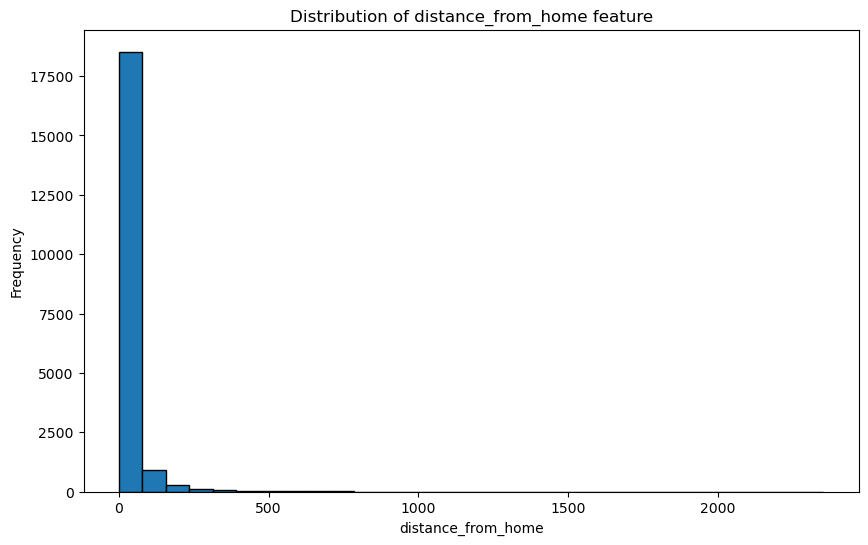

Outliers removed: 5646
Cleaned and scaled dataset (first few rows):
   distance_from_home  distance_from_last_transaction  \
0            0.966603                        0.038063   
1            0.180236                        0.021435   
2            0.084316                        0.098665   
3            0.036789                        0.686869   
4            0.737838                        0.069388   

   ratio_to_median_purchase_price  repeat_retailer  used_chip  \
0                        0.429673              1.0        1.0   
1                        0.284637              1.0        0.0   
2                        0.091802              1.0        0.0   
3                        0.077325              1.0        1.0   
4                        0.491279              1.0        1.0   

   used_pin_number  online_order  fraud  
0              0.0           0.0    0.0  
1              0.0           0.0    0.0  
2              0.0           1.0    0.0  
3              0.0           1

In [11]:
# Import necessary libraries for data handling, plotting, and scaling
import pandas as pd  # Pandas is used for handling data in tabular form
import matplotlib.pyplot as plt  # Matplotlib is used for visualizing the data
from sklearn.preprocessing import MinMaxScaler  # Scikit-learn's MinMaxScaler is used for feature scaling

# Step 1: Load the dataset from the given file path
file_path = "C:\\Users\\sivad\\OneDrive\\Desktop\\project\\cleaned_fraud_data.csv"  # Define the path to the dataset
df = pd.read_csv(file_path)  # Read the CSV file and store it in a pandas DataFrame

# Step 2: Explore the dataset by printing the first few rows
print("First few rows of the dataset:")
print(df.head())  # Displays the first 5 rows to get an initial idea of the data structure

# Check for missing values to ensure the dataset is complete
print("Checking for missing values:")
missing_values = df.isnull().sum()  # Calculate the number of missing values in each column
print(missing_values)  # Print the missing values count for each column

# Step 3: Check for outliers in the 'distance_from_home' feature
plt.figure(figsize=(10, 6))  # Set the size of the plot for better readability
plt.hist(df['distance_from_home'], bins=30, edgecolor='black')  # Plot the distribution of 'distance_from_home' with 30 bins
plt.title('Distribution of distance_from_home feature')  # Add a title to the plot
plt.xlabel('distance_from_home')  # Label the x-axis
plt.ylabel('Frequency')  # Label the y-axis
plt.show()  # Display the histogram, used for visualizing the presence of outliers

# Step 4: Handle outliers using the Interquartile Range (IQR) method
# Calculate the 1st quartile (25%) and the 3rd quartile (75%) for selected numerical features
Q1 = df[['distance_from_home', 'distance_from_last_transaction', 'ratio_to_median_purchase_price']].quantile(0.25)
Q3 = df[['distance_from_home', 'distance_from_last_transaction', 'ratio_to_median_purchase_price']].quantile(0.75)
IQR = Q3 - Q1  # Compute the Interquartile Range (IQR), which measures the spread of the middle 50% of the data

# Filter the data to remove outliers: data points that are outside the range of [Q1 - 1.5 * IQR, Q3 + 1.5 * IQR] are considered outliers
df_cleaned = df[~((df[['distance_from_home', 'distance_from_last_transaction', 'ratio_to_median_purchase_price']] < (Q1 - 1.5 * IQR)) |
                  (df[['distance_from_home', 'distance_from_last_transaction', 'ratio_to_median_purchase_price']] > (Q3 + 1.5 * IQR))).any(axis=1)].copy()

# Print the number of records removed due to outliers
outliers_removed = df.shape[0] - df_cleaned.shape[0]  # Calculate how many rows were removed due to outliers
print(f"Outliers removed: {outliers_removed}")  # Display the number of outliers removed

# Step 5: Feature engineering - Scale the continuous numerical features
# Create a MinMaxScaler object, which scales features to a range of [0, 1]
scaler = MinMaxScaler()

# List of features to scale (continuous variables)
continuous_features = ['distance_from_home', 'distance_from_last_transaction', 'ratio_to_median_purchase_price']

# Apply the scaler to the selected features in the cleaned DataFrame
df_cleaned.loc[:, continuous_features] = scaler.fit_transform(df_cleaned[continuous_features])

# Display the cleaned and scaled dataset (showing the first few rows)
print("Cleaned and scaled dataset (first few rows):")
print(df_cleaned.head())  # Show the first 5 rows of the cleaned and scaled data for inspection




#Step 1: Loading the Dataset
#The dataset (cleaned_fraud_data.csv) is loaded into a pandas DataFrame, which allows easy manipulation and analysis. 
#The pd.read_csv() function reads the file from the given path.

#Step 2: Exploring the Dataset
#The first few rows are displayed to understand the structure of the dataset.
#Missing values are checked using df.isnull().sum(). This is crucial because missing data can lead to errors or inaccurate analysis.

#Step 3: Checking for Outliers
#A histogram is plotted to visualize the distribution of the distance_from_home feature.
#This is a simple but effective way to spot outliers in the data.

#Step 4: Handling Outliers Using IQR
#The IQR method is used to identify and remove outliers. This is done by calculating the 1st and 3rd quartiles (Q1 and Q3) for the selected numerical features.
#Any data points that fall outside the range of [Q1 - 1.5 * IQR, Q3 + 1.5 * IQR] are considered outliers and removed.

#Step 5: Feature Engineering (Scaling)
#MinMaxScaler is applied to the continuous features to scale them to a range between 0 and 1. This helps normalize the data, which is often required for machine learning models to perform well.
#The scaled data is then printed to verify the transformation.
#This code performs essential steps in data preprocessing: loading the dataset, handling missing values, identifying and removing outliers, and scaling numerical features for further analysis or model building.
